<a href="https://colab.research.google.com/github/hamdansethi/NLP/blob/main/04_Information_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
information = "When Harry met Sally"
words = information.split()
print (f"Participant1 = {words[words.index('met')-1]}")
print (f"Action = met")
print (f"Participant2 = {words[words.index('met')+1]}")

Participant1 = Harry
Action = met
Participant2 = Sally


In [ ]:
meetings = [('Boris Johnson', 'meets with', 'the Queen'),
            ('Donald Trump', 'meets with', 'his cabinet'),
            ('administration', 'meets with', 'tech giants'),
            ('the Queen', 'meets with', 'the Prime Minister'),
            ('Donald Trump', 'meets with', 'Finnish President')]

query = [p2 for (p1, act, p2) in meetings if p1=='Donald Trump']
print(query)

['his cabinet', 'Finnish President']


In [ ]:
meetings = [('Boris Johnson', 'meets with', 'the Queen'),
            ('Donald Trump', 'meets with', 'his cabinet'),
            ('administration', 'meets with', 'tech giants'),
            ('the Queen', 'meets with', 'the Prime Minister'),
            ('Donald Trump', 'meets with', 'Finnish President')]

query = [p2 for (p1, act, p2) in meetings if p1=='the Queen']
query += [p1 for (p1, act, p2) in meetings if p2=='the Queen']
print(query)

['the Prime Minister', 'Boris Johnson']


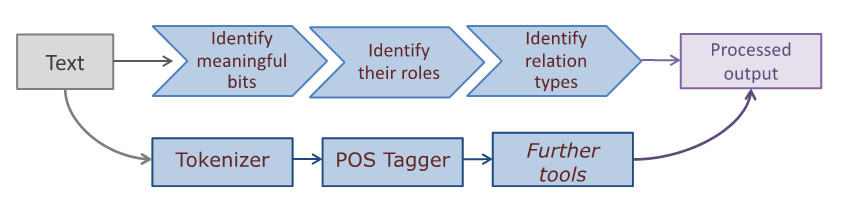

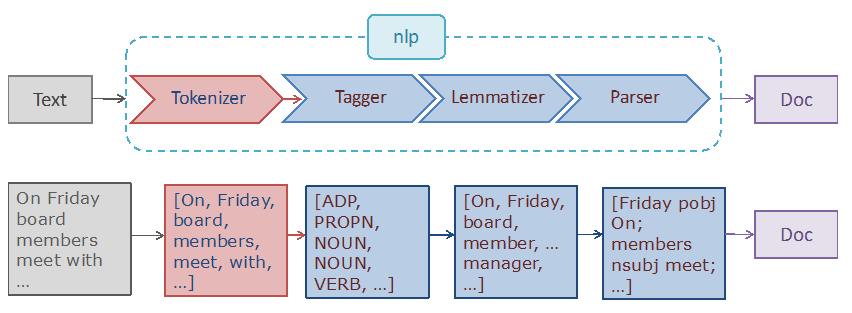

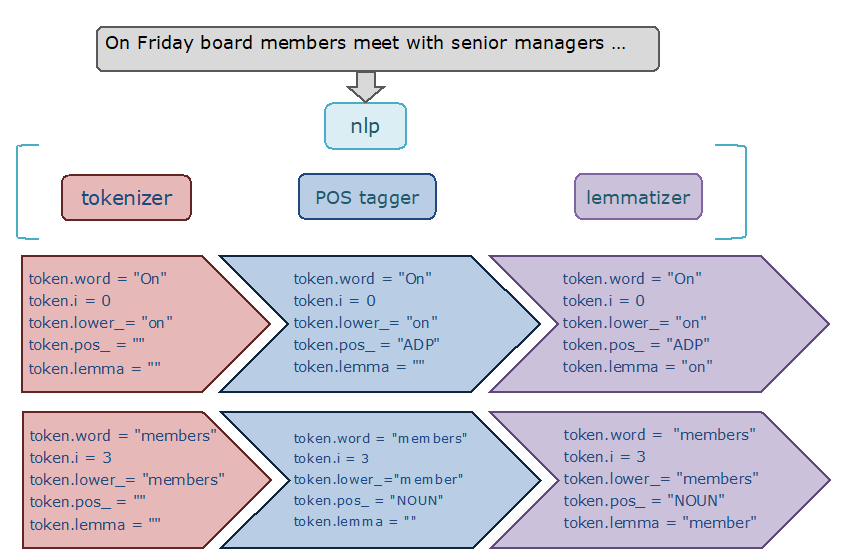

In [2]:
import spacy #A

nlp = spacy.load("en_core_web_sm") #B

doc = nlp("On Friday board members meet with senior managers " + "to discuss future development of the company.") #C

rows = []
rows.append(["Word", "Position", "Lowercase", "Lemma", "POS", "Alphanumeric", "Stopword"]) #D

for token in doc:
  rows.append([token.text,
               str(token.i),
               token.lower_,
               token.lemma_,
               token.pos_,
               str(token.is_alpha),
               str(token.is_stop)]) #E

columns = zip(*rows) #F
column_widths = [max(len(item) for item in col) for col in columns] #G

for row in rows:
  print(''.join(' {:{width}} '.format(row[i], width=column_widths[i]) for i in range(0, len(row)))) #H


#A Start by importing spaCy library
#B spacy.load command initializes the nlp pipeline
#C Provide the nlp pipeline with input text
#D Print the output in a tabular format and add a header to the printout for clarity
#E Add the attributes of each token in the processed text to the output for printing
#F Python’s zip function allows you to reformat input from row-wise representation to column-wise
#G Calculate the maximum length of strings in each column to allow enough space in the printout
#H Use format functionality to adjust the width of each column in each row while printing out the results

 Word         Position  Lowercase    Lemma        POS    Alphanumeric  Stopword 
 On           0         on           on           ADP    True          True     
 Friday       1         friday       Friday       PROPN  True          False    
 board        2         board        board        NOUN   True          False    
 members      3         members      member       NOUN   True          False    
 meet         4         meet         meet         VERB   True          False    
 with         5         with         with         ADP    True          True     
 senior       6         senior       senior       ADJ    True          False    
 managers     7         managers     manager      NOUN   True          False    
 to           8         to           to           PART   True          True     
 discuss      9         discuss      discuss      VERB   True          False    
 future       10        future       future       ADJ    True          False    
 development  11        deve

In [ ]:
doc = nlp("Beware the Jabberwock, my son! The jaws that bite, the claws that catch! Beware the Jubjub bird, and shun The frumious Bandersnatch!")

rows = []
rows.append(["Word", "Position", "Lowercase", "Lemma", "POS", "Alphanumeric", "Stopword"])

for token in doc:
  rows.append([token.text,
               str(token.i),
               token.lower_,
               token.lemma_,
               token.pos_,
               str(token.is_alpha),
               str(token.is_stop)])

columns = zip(*rows)
column_widths = [max(len(item) for item in col) for col in columns]

for row in rows:
  print(''.join(' {:{width}} '.format(row[i], width=column_widths[i]) for i in range(0, len(row))))

 Word          Position  Lowercase     Lemma         POS    Alphanumeric  Stopword 
 Beware        0         beware        beware        VERB   True          False    
 the           1         the           the           DET    True          True     
 Jabberwock    2         jabberwock    Jabberwock    PROPN  True          False    
 ,             3         ,             ,             PUNCT  False         False    
 my            4         my            my            PRON   True          True     
 son           5         son           son           NOUN   True          False    
 !             6         !             !             PUNCT  False         False    
 The           7         the           the           DET    True          True     
 jaws          8         jaws          jaw           NOUN   True          False    
 that          9         that          that          PRON   True          True     
 bite          10        bite          bite          VERB   True          Fa

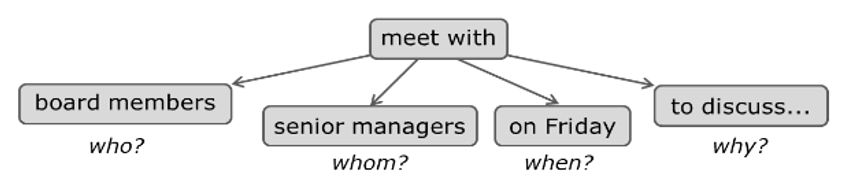

In [ ]:
doc = nlp("On Friday, board members meet with senior managers " + "to discuss future development of the company.") #B

for chunk in doc.noun_chunks: #C
  print('\t'.join([chunk.text,
                   chunk.root.text,
                   chunk.root.dep_,
                   chunk.root.head.text])) #D

#B Provide the nlp pipeline with input text
#C You can access noun phrases by doc.noun_chunks
#D Print out the phrase, its head, the type of relation to the next most important word and the word itself

Friday	Friday	pobj	On
board members	members	nsubj	meet
senior managers	managers	nsubj	discuss
future development	development	dobj	discuss
the company	company	pobj	of


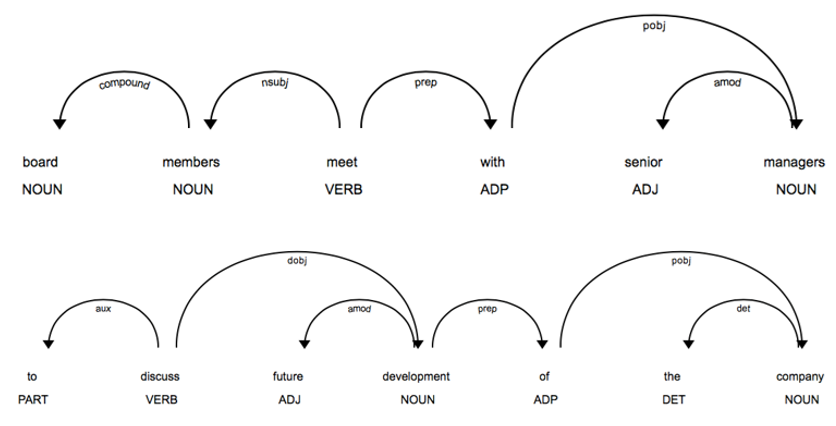

In [ ]:
from spacy import displacy #A
from pathlib import Path #B

svg = displacy.render(doc, style='dep', jupyter=False) #C
file_name = '-'.join([w.text for w in doc if not w.is_punct]) + ".svg"
output_path = Path(file_name) #D
output_path.open("w", encoding="utf-8").write(svg) #E

#A Import spaCy’s visualization tool displacy22
#B Path helps you define the location for the file to store the visualization
#C Use displacy to visualize dependencies over the input text with appropriate arguments
#D The file the output is stored to simply uses the words from the sentence in its name
#E This line writes the output to the specified file

12224

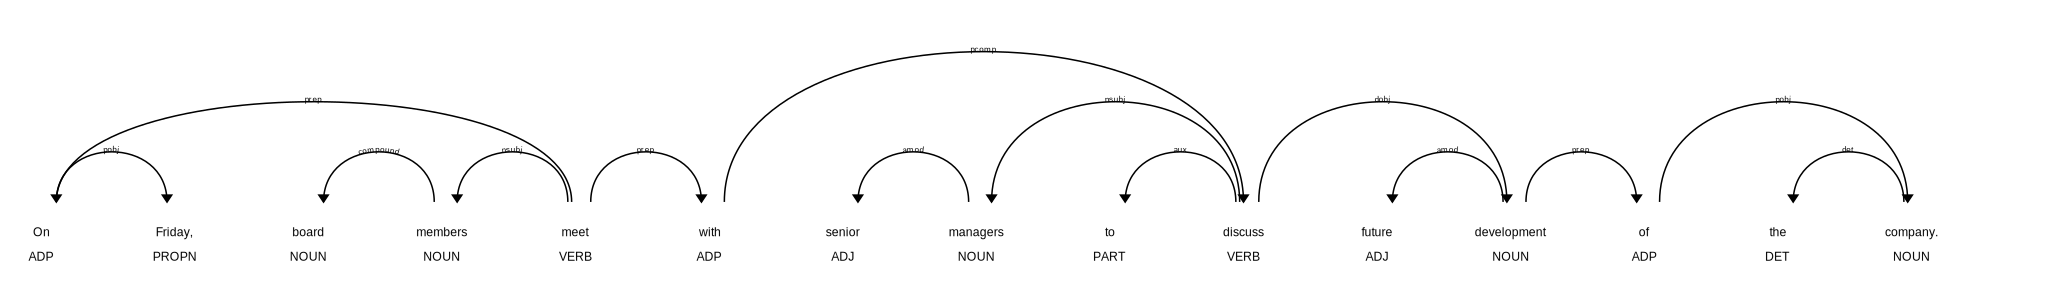

In [ ]:
from IPython.display import SVG, display

file_name = "/content/On-Friday-board-members-meet-with-senior-managers-to-discuss-future-development-of-the-company.svg"
display(SVG(file_name))

In [ ]:
for token in doc:
  print(token.text,
        token.dep_,
        token.head.text,
        token.head.pos_,
        [child for child in token.children]) #A

#A This code assumes that spaCy is imported and input text is already fed into the pipeline

On prep meet VERB [Friday]
Friday pobj On ADP []
, punct meet VERB []
board compound members NOUN []
members nsubj meet VERB [board]
meet ROOT meet VERB [On, ,, members, with, .]
with prep meet VERB [discuss]
senior amod managers NOUN []
managers nsubj discuss VERB [senior]
to aux discuss VERB []
discuss pcomp with ADP [managers, to, development]
future amod development NOUN []
development dobj discuss VERB [future, of]
of prep development NOUN [company]
the det company NOUN []
company pobj of ADP [the]
. punct meet VERB []


In [ ]:
headers = ["Token", "Dependency", "Head Text", "Head POS", "Children"]
print(f"{headers[0]:<15} {headers[1]:<15} {headers[2]:<15} {headers[3]:<10} {headers[4]}")

print("-" * 70)

for token in doc:
    print(f"{token.text:<15} {token.dep_:<15} {token.head.text:<15} {token.head.pos_:<10} {[child.text for child in token.children]}")


Token           Dependency      Head Text       Head POS   Children
----------------------------------------------------------------------
On              prep            meet            VERB       ['Friday']
Friday          pobj            On              ADP        []
,               punct           meet            VERB       []
board           compound        members         NOUN       []
members         nsubj           meet            VERB       ['board']
meet            ROOT            meet            VERB       ['On', ',', 'members', 'with', '.']
with            prep            meet            VERB       ['discuss']
senior          amod            managers        NOUN       []
managers        nsubj           discuss         VERB       ['senior']
to              aux             discuss         VERB       []
discuss         pcomp           with            ADP        ['managers', 'to', 'development']
future          amod            development     NOUN       []
development     dobj 

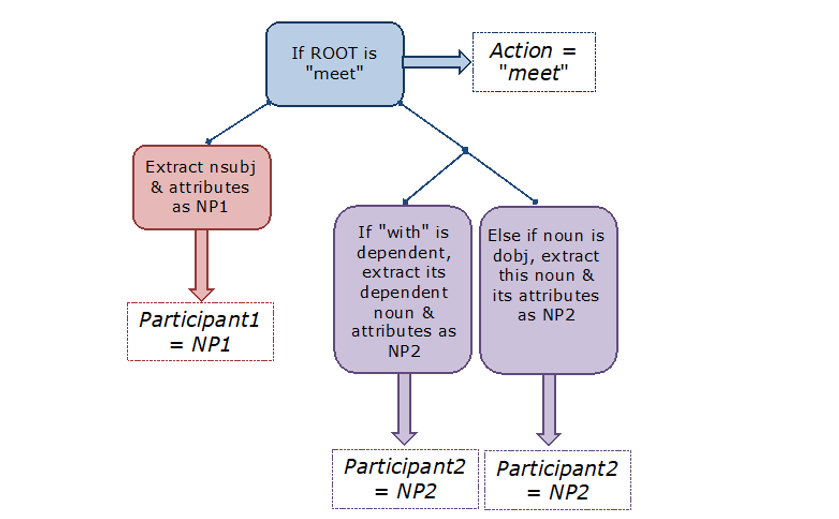

In [ ]:
doc = nlp("On Friday, board members meet with senior managers to discuss future development of the company.")

In [ ]:
doc = nlp("On Friday, board members meet with senior managers.")

In [ ]:
for token in doc: #A

  if token.lemma_=="meet" and token.pos_=="VERB" and token.dep_=="ROOT": #B

    action = token.text #C
    children = [child for child in token.children] #D

    participant1 = ""
    participant2 = ""

    for child1 in children:

      if child1.dep_=="nsubj":
        participant1 = " ".join([attr.text for attr in child1.children]) + " " + child1.text #E

      elif child1.text=="with": #F

        action += " " + child1.text
        child1_children = [child for child in child1.children]

        for child2 in child1_children:
          if child2.pos_ == "NOUN":
            participant2 = " ".join([attr.text for attr in child2.children]) + " " + child2.text #G

print (f"Participant1 = {participant1}")
print (f"Action = {action}")
print (f"Participant2 = {participant2}") #H

#A This code assumes that spaCy is imported and input text is already fed into the pipeline
#B Check that the ROOT of the sentence is a verb with the base form (lemma) “meet”
#C This verb expresses the action itself
#D Extract the list of all dependents of this verb using token.children
#E Find noun that is the subject of the action verb using nsubj relation
#F Check if the verb has preposition “with” as one of its dependents
#G Extract the noun that is dependent on this preposition together with its attributes
#H Print out the results

Participant1 = board members
Action = meet with
Participant2 = senior managers


In [3]:
sentences = [
    "On Friday, board members meet with senior managers, to discuss future development of the company.",
    "Boris Johnson met with the Queen last week.",
    "Donald Trump meets the Queen at Buckingham Palace.",
    "The two leaders also posed for photographs and the President talked to reporters." #A
]

def extract_information(doc): #B
    action = ""
    participant1 = ""
    participant2 = ""

    for token in doc:
        if token.lemma_ == "meet" and token.pos_ == "VERB" and token.dep_ == "ROOT":
            action = token.text
            children = [child for child in token.children]
            for child1 in children:
                if child1.dep_ == "nsubj":
                    participant1 = " ".join([attr.text for attr in child1.children]) + " " + child1.text
                elif child1.text == "with":
                    action += " " + child1.text
                    child1_children = [child for child in child1.children]
                    for child2 in child1_children:
                        if child2.pos_ == "NOUN" or child2.pos_ == "PROPN": #C
                            participant2 = " ".join([attr.text for attr in child2.children]) + " " + child2.text
                elif child1.dep_ == "dobj" and (child1.pos_ == "NOUN" or child1.pos_ == "PROPN"): #D
                    participant2 = " ".join([attr.text for attr in child1.children]) + " " + child1.text

    print(f"Participant1 = {participant1}")
    print(f"Action = {action}")
    print(f"Participant2 = {participant2}")

for sent in sentences:
    print(f"\nSentence = {sent}")
    doc = nlp(sent)
    extract_information(doc) #E


#A Provide your code with a diverse set of sentences
#B Define a function to apply all the steps in the information extraction algorithm
#C Extract participants expressed with proper nouns (PROPN) as well as common nouns (NOUN)
#D Add the elif branch that covers the direct object (dobj) case
#E Apply extract_information function to each sentence and print out the actions and participants


Sentence = On Friday, board members meet with senior managers, to discuss future development of the company.
Participant1 = board members
Action = meet with
Participant2 = senior managers

Sentence = Boris Johnson met with the Queen last week.
Participant1 = Boris Johnson
Action = met with
Participant2 = the Queen

Sentence = Donald Trump meets the Queen at Buckingham Palace.
Participant1 = Donald Trump
Action = meets
Participant2 = the at Queen

Sentence = The two leaders also posed for photographs and the President talked to reporters.
Participant1 = 
Action = 
Participant2 = 
